In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
class TimeSeriesData():
  def __init__(self,num_points,xmin,xmax):

    self.xmin=xmin
    self.xmax=xmax
    self.num_points = num_points
    self.resolution = (xmax-xmin)/num_points
    self.x_data = np.linspace(xmin,xmax,num_points)
    self.y_true = np.sin(self.x_data)
  
  def ret_true(self,x_series):
    return np.sin(x_series)
  
  def next_batch(self, batch_size,steps,return_batch_ts =False ):
    rand_start = np.random.rand(batch_size,1)
    ts_start = rand_start * (self.xmax - self.xmin - (steps*self.resolution))
    batch_ts = ts_start + np.arange(0.0,steps+1)*self.resolution 
    y_batch = np.sin(batch_ts)
    if return_batch_ts:
      return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1) , batch_ts
    else:
      return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)


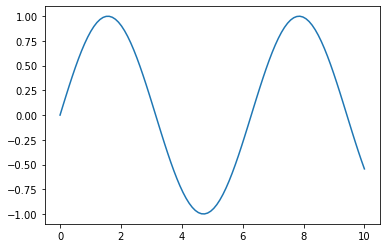

In [ ]:
ts_data = TimeSeriesData(100,0,10)
plt.plot(ts_data.x_data,ts_data.y_true)

In [ ]:
num_timesteps =30
y1,y2,ts = ts_data.next_batch(1,num_timesteps,True)

<function matplotlib.pyplot.tight_layout>

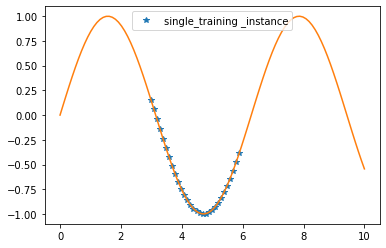

In [ ]:
plt.plot(ts.flatten()[1:],y2.flatten(),"*",label='single_training _instance')
plt.plot(ts_data.x_data,ts_data.y_true)
plt.legend()
plt.tight_layout

In [ ]:
train_instance = np.linspace(5,,5+ts_data.resolution*(num_timesteps+1),num_timesteps+1)
train_instance

array([5.        , 5.10333333, 5.20666667, 5.31      , 5.41333333,
       5.51666667, 5.62      , 5.72333333, 5.82666667, 5.93      ,
       6.03333333, 6.13666667, 6.24      , 6.34333333, 6.44666667,
       6.55      , 6.65333333, 6.75666667, 6.86      , 6.96333333,
       7.06666667, 7.17      , 7.27333333, 7.37666667, 7.48      ,
       7.58333333, 7.68666667, 7.79      , 7.89333333, 7.99666667,
       8.1       ])

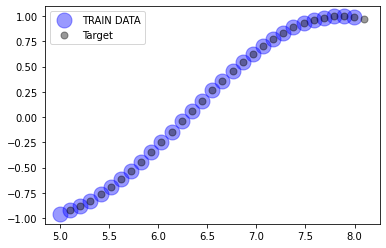

In [ ]:
plt.plot(train_instance[0:-1],ts_data.ret_true(train_instance[0:-1]),"bo",markersize=15,alpha=0.4,label="TRAIN DATA")
plt.plot(train_instance[1:],ts_data.ret_true(train_instance[1:]),"ko",markersize=7,alpha=0.4, label="Target")
plt.legend()

In [ ]:
num_inputs=1
num_outputs=1
batch_size=1
num_neurons = 100
num_training = 2000
learning_rate = 0.0001
tf.compat.v1.disable_eager_execution()

In [ ]:
X = tf.compat.v1.placeholder(tf.float32,[None,num_timesteps,num_inputs])

In [ ]:
y = tf.compat.v1.placeholder(tf.float32,[None,num_timesteps,num_outputs])
